# Analysis the measures of the clusterings

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro
from scipy.stats import skew, kurtosis
from sklearn.decomposition import PCA
import matplotlib as mpl

import warnings

from util import centimeter_to_inch, get_default_colors_seaborn

warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na option is deprecated.*")

## Loading data

In [61]:
df_base = pd.read_csv('data/output/df_base_without_missing_points.csv', index_col=0)

## Util

In [62]:
k_minimum = 2
k_maximum = 7

In [63]:
def delta(metrica):
    delta_k = {}
    for i in range(1, len(df_metrics) - 1):
        k = df_metrics.k.values[i]
        ch_k = metrica.values[i]
        ch_posterior =  metrica.values[i+1]
        ch_anterior =  metrica.values[i-1]
        delta_k[k] = (ch_posterior - ch_k) - (ch_k - ch_anterior)

    return delta_k

def plot_measure(metrica):
    sns.set(font_scale=1.5)
    fig = plt.figure(figsize=(6,4))
    sns.lineplot(x=df_metrics.k, y=metrica)
    plt.xticks(df_metrics.k)
    plt.show()
    
def plot_measures(metrics, labels):
    sns.set(font_scale=1.1)
    sns.set_style("ticks")
    sns.set_palette("gray")
    fig, ax = plt.subplots(figsize=(centimeter_to_inch(34.8), centimeter_to_inch(7.5)), nrows=1, ncols=3)
    for i in range(len(metrics)):
        metric = metrics[i]
        label = labels[i]
        sns.lineplot(x=df_metrics.k, y=metric, ax=ax[i])
        ax[i].set_title(label)
        ax[i].set_ylabel(None)
        ax[i].set_xticks(df_metrics.k)
        plt.setp(ax[i].artists, edgecolor = 'black')
        plt.setp(ax[i].lines, color='black')
    fig.tight_layout()    
    plt.savefig('images/clustering_measures.pdf', bbox_inches="tight")
    plt.show()    

def plot_delta(metrica):
    d = delta(metrica)
    sns.set(font_scale=1.5)
    fig = plt.figure(figsize=(6,4))
    sns.lineplot(x=d.keys(), y=d.values())
    plt.xticks(df_metrics.k)
    plt.xlabel('k')
    plt.ylabel('Delta')
    plt.show()

def plot_clusters(df_X, Y):
    sns.set(font_scale=1)
    palette = 'Paired'
    fig = plt.figure(figsize=(10,7))
    labels, index = np.unique(Y, return_inverse=True)
    grafico = plt.scatter(x=df_X.principal_component_1, y=df_X.principal_component_2, cmap=palette, c=index)
    plt.legend(grafico.legend_elements()[0], labels, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Principal component 1')
    plt.ylabel('Principal component 2')
    plt.show()

def plot_clusters_original_attributes(axi_x, axi_y, Y):
    sns.set(font_scale=1)
    palette = 'Paired'
    fig = plt.figure(figsize=(10,7))
    labels, index = np.unique(Y, return_inverse=True)
    grafico = plt.scatter(x=axi_x, y=axi_y, cmap=palette, c=index)
    plt.legend(grafico.legend_elements()[0], labels, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel(axi_x.name)
    plt.ylabel(axi_y.name)
    plt.show()

## Analysis

In [64]:
df_without_collinearity_standardized = pd.read_csv('data/output/df_without_collinearity_standardized.csv', index_col=0)

In [65]:
features_without_collinearity = df_without_collinearity_standardized.columns

features_to_transform = [
    'percentage_estimated_households_in_informal_settlements', 
    'demographic_density_in_informal_settlements', 
    'percentage_hospitalizations_diseases_inadequate_sanitation',       
    'percentage_indigenous_population'
]
features_without_collinearity_transformed = [
    f'sqrt_{feature}' if feature in features_to_transform else feature 
    for feature in features_without_collinearity
]

features_to_transform = [
    'demographic_density',  
    'per_capita_income'
]
features_without_collinearity_transformed = [
    f'log_{feature}' if feature in features_to_transform else feature 
    for feature in features_without_collinearity_transformed
]


 *** DATASET NAME:  df_standardized
pca
all
full


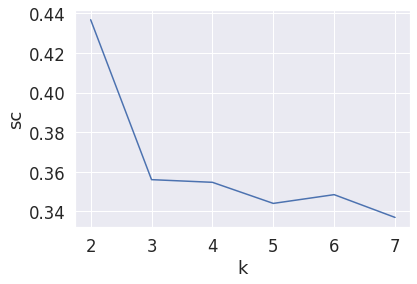

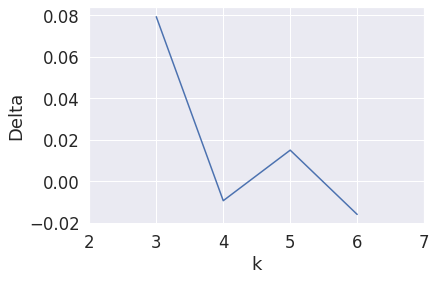

tied


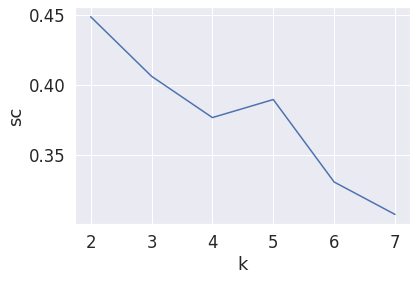

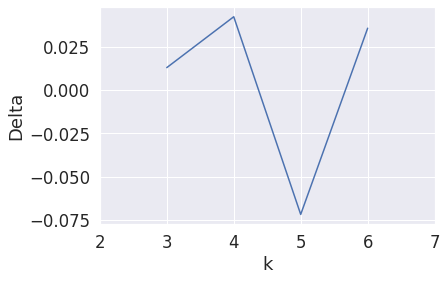

diag


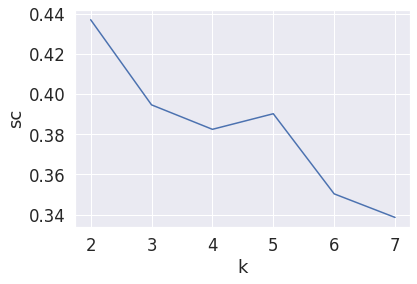

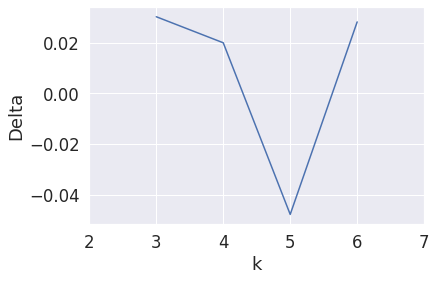

spherical


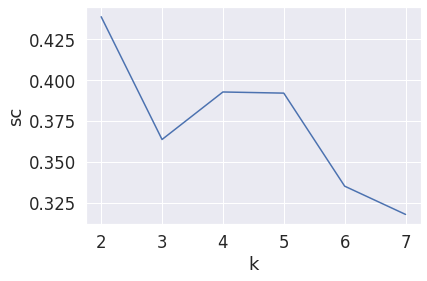

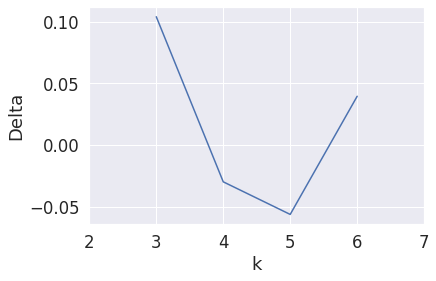


 *** DATASET NAME:  df_normalized_min_max
pca
all
full


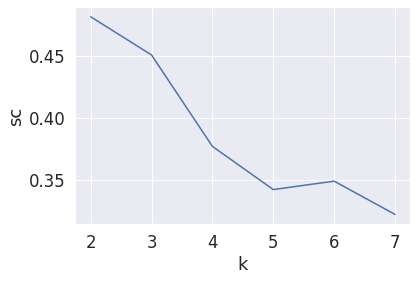

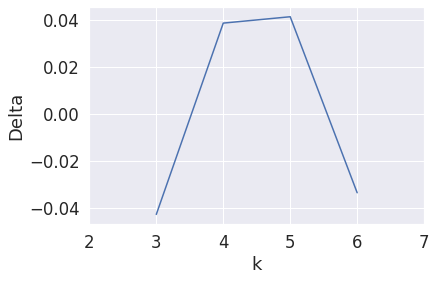

tied


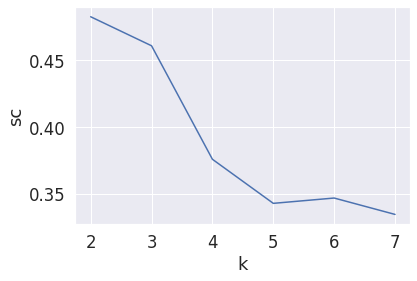

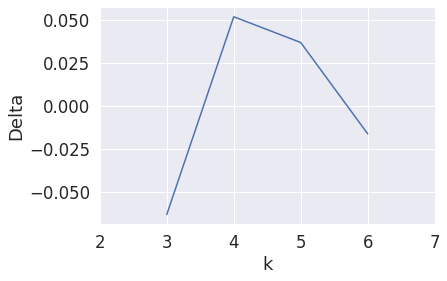

diag


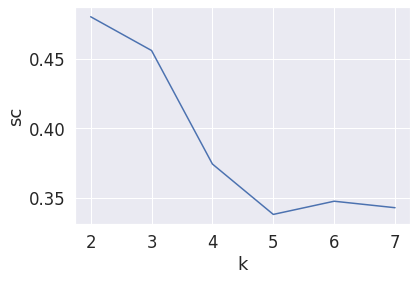

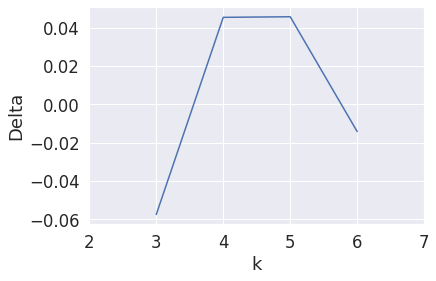

spherical


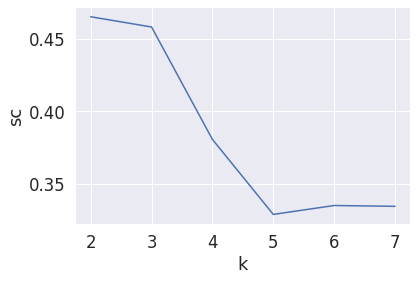

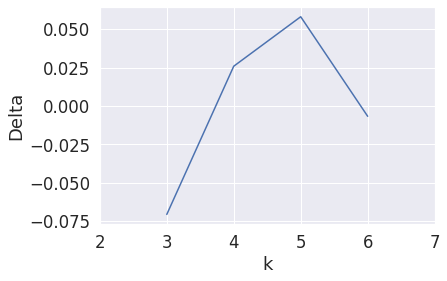


 *** DATASET NAME:  df_normalized_l2
pca
all
full


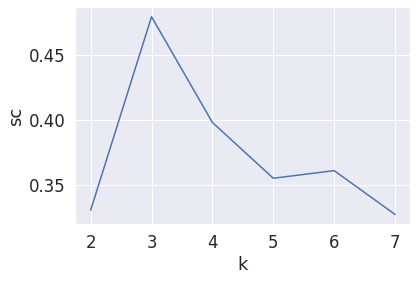

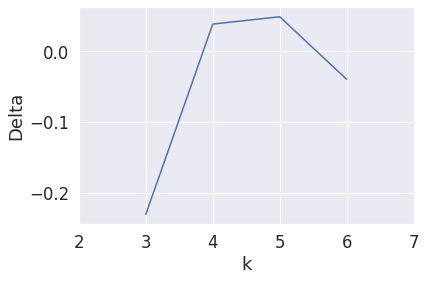

tied


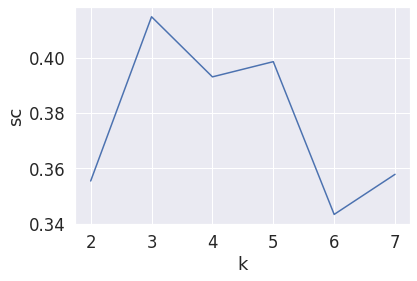

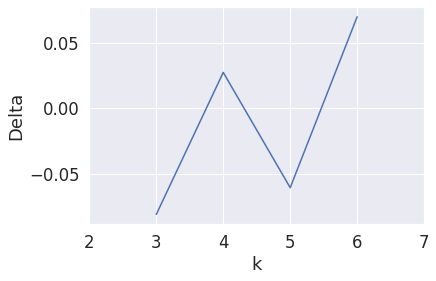

diag


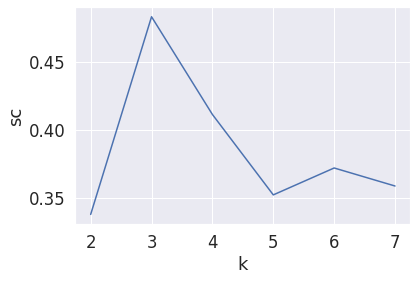

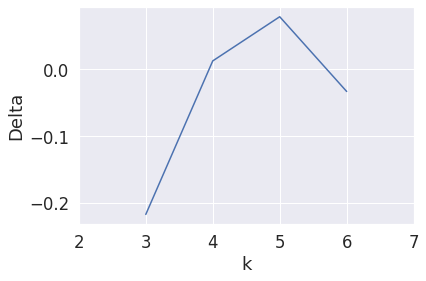

spherical


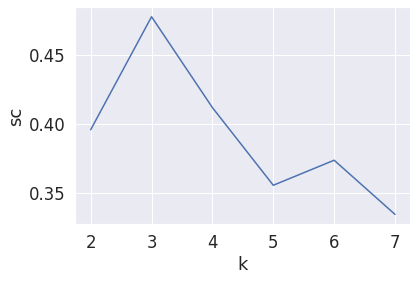

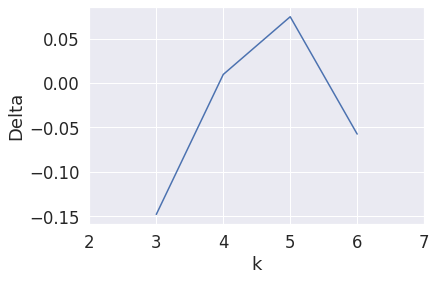


 *** DATASET NAME:  df_normalized_l1
pca
all
full


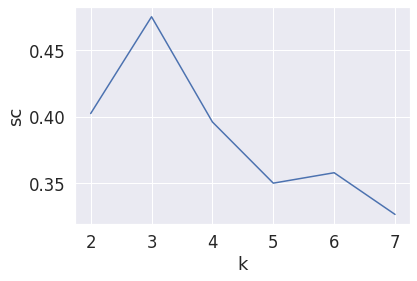

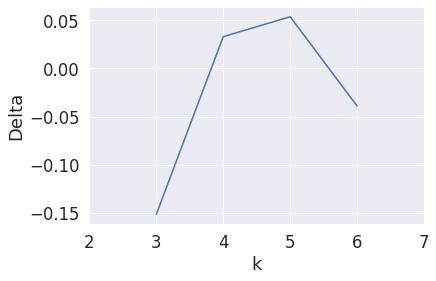

tied


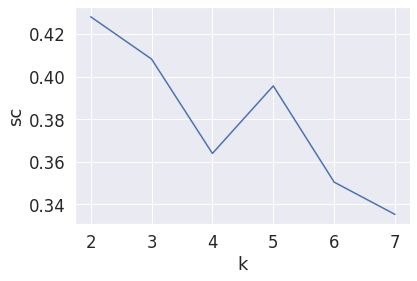

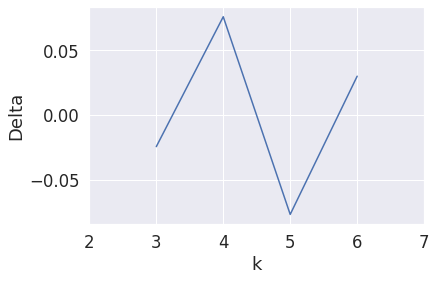

diag


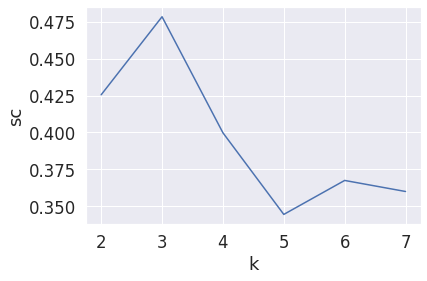

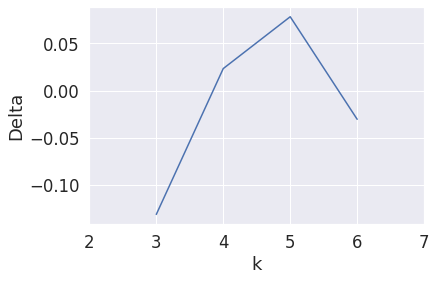

spherical


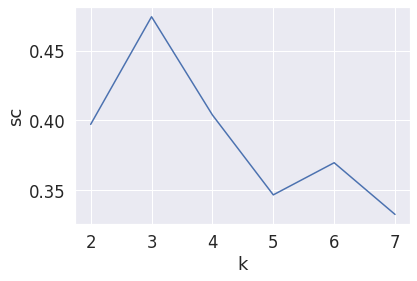

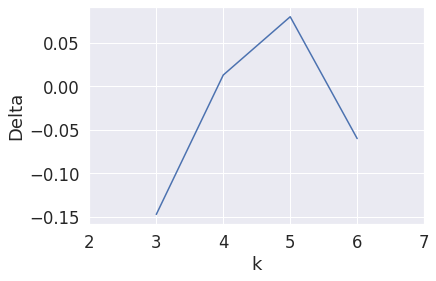


 *** DATASET NAME:  df_normalized_max
pca
all
full


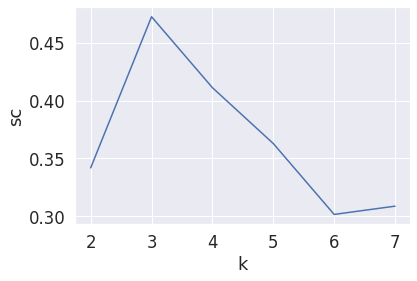

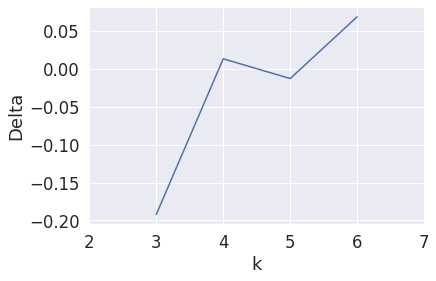

tied


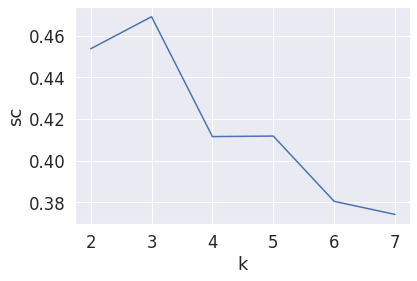

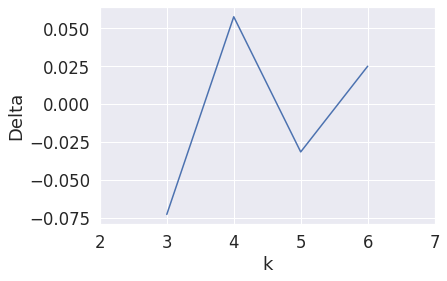

diag


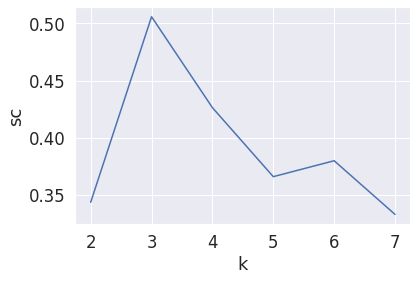

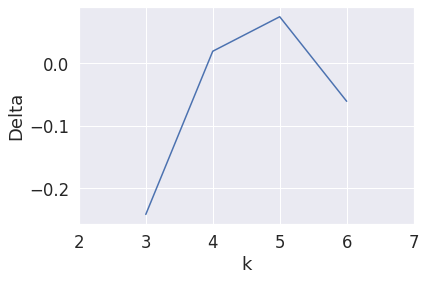

spherical


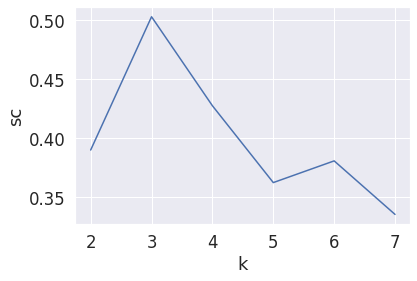

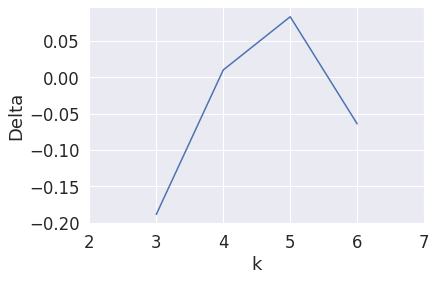

In [66]:
list_dataset_names = ['df_standardized', 'df_normalized_min_max', 'df_normalized_l2', 'df_normalized_l1', 'df_normalized_max']

for dataset_name in list_dataset_names:
    print("\n *** DATASET NAME: ", dataset_name)
    
    # for dataset_type in ['features', 'pca']:
    for dataset_type in ['pca']:
        print(dataset_type)        
                
        # for set_features in ['all', 'without_collinearity']:
        for set_features in ['all']:
            print(set_features)
            
            list_covariance_types = ['full', 'tied', 'diag', 'spherical']
            if dataset_type == 'features':
                # list_covariance_types = ['full', 'tied', 'diag', 'spherical']
                df_features = pd.read_csv('data/output/'+dataset_name+'.csv', index_col=0)
                if set_features == 'all':
                    df = df_features
                elif dataset_name == 'df_standardized':
                    df = df_features[features_without_collinearity]
                else:
                    df = df_features[features_without_collinearity_transformed]
            else:
                # list_covariance_types = ['spherical']
                if set_features == 'all':
                    df = pd.read_csv('data/output/'+dataset_name+'_pca.csv', index_col=0)
                else:
                    df = pd.read_csv('data/output/'+dataset_name+'_without_collinearity_pca.csv', index_col=0)
            
            for covariance_type in list_covariance_types:  
                print(covariance_type)
                
                df_y = pd.read_csv('data/output/'+dataset_name+'_'+dataset_type+'_'+set_features+'_'+covariance_type+'_clustering.csv', index_col=0) 
                df_metrics = pd.read_csv('data/output/'+dataset_name+'_'+dataset_type+'_'+set_features+'_'+covariance_type+'_measures.csv', index_col=0)
                
                # for k in range(k_minimum, k_maximum+1):
                #     plot_clusters(df, df_y[str(k)])
            
                plot_measure(df_metrics.sc)
                plot_delta(df_metrics.sc)
                # plot_measure(df_metrics.ch)
                # plot_delta(df_metrics.ch)
                # plot_measure(df_metrics.db)
                # plot_delta(df_metrics.db)

## Sociodemographic analysis for the selected model

3    0.392079
Name: sc, dtype: float64


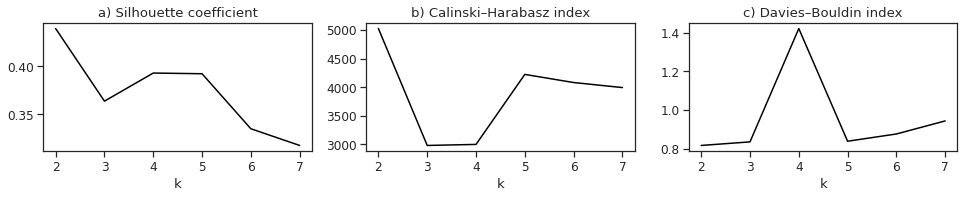

In [67]:
selected_k = 5
selected_dataset = 'df_standardized'
selected_dataset_type = 'pca'
selected_set_features = 'all'
selected_covariance_type = 'spherical'

if selected_dataset_type == 'features':    
    df_features = pd.read_csv('data/output/'+selected_dataset+'.csv', index_col=0)
    if selected_set_features == 'all':
        df = df_features
    elif selected_dataset == 'df_standardized':
        df = df_features[features_without_collinearity]
    else:
        df = df_features[features_without_collinearity_transformed]
else:
    if selected_set_features == 'all':
        df = pd.read_csv('data/output/'+selected_dataset+'_pca.csv', index_col=0)
    else:
        df = pd.read_csv('data/output/'+selected_dataset+'_without_collinearity_pca.csv', index_col=0)

df_metrics = pd.read_csv('data/output/'+selected_dataset+'_'+selected_dataset_type+'_'+selected_set_features+'_'+selected_covariance_type+'_measures.csv', index_col=0)
df_y = pd.read_csv('data/output/'+selected_dataset+'_'+selected_dataset_type+'_'+selected_set_features+'_'+selected_covariance_type+'_clustering.csv', index_col=0)[[str(selected_k)]]
df_y.columns = ['cluster']
df_base_clusters = df_y.merge(df_base, left_index=True, right_index=True)

print(df_metrics[df_metrics['k']==selected_k]['sc'])                
# plot_measure(df_metrics.sc)
# plot_delta(df_metrics.sc)
# plot_measure(df_metrics.ch)
# plot_delta(df_metrics.ch)
# plot_measure(df_metrics.db)
# plot_delta(df_metrics.db)          
# plot_clusters(df, df_base_clusters['cluster'])

plot_measures([df_metrics.sc, df_metrics.ch, df_metrics.db], ['a) Silhouette coefficient', 'b) Calinski–Harabasz index', 'c) Davies–Bouldin index'])

In [68]:
df_base_clusters.drop(columns=['code_municipality_7']).groupby('cluster').count()['municipality']

cluster
0    2136
1     857
2     261
3     312
4    1994
Name: municipality, dtype: int64

In [69]:
df_base_clusters.drop(columns=['code_municipality_7','municipality']).groupby('cluster').mean().round(2)

,population,latitude,longitude,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,percentage_urban_population,demographic_density,average_residents_per_households,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
cluster,,,,,,,,,,,,,,,,,,,,,
0,16265.10,-10.07,-42.04,29.77,29.33,25.14,15.77,54.14,36.09,2.94,...,23.46,8.20,71.40,1.92,43.44,9.68,30.72,5.03,18.54,8.93
1,5649.52,-24.64,-50.34,23.04,25.50,28.49,22.98,46.23,21.04,2.63,...,36.66,2.90,56.15,0.51,51.39,7.17,24.89,7.95,7.09,10.15
2,354001.23,-15.63,-44.01,28.16,31.95,26.33,13.60,92.44,1454.79,2.85,...,20.19,10.41,38.57,2.12,5.93,16.85,47.44,11.97,6.23,9.56
3,22566.07,-4.43,-49.75,38.96,30.80,19.92,10.39,44.01,14.84,3.72,...,29.30,7.94,80.84,4.23,52.89,7.72,27.05,3.54,19.29,8.01
4,31966.65,-21.73,-48.67,25.25,28.82,27.54,18.41,81.08,83.11,2.70,...,20.71,6.17,39.24,0.65,21.51,12.61,36.46,15.86,6.19,9.96


In [70]:
df_base_clusters.drop(columns=['code_municipality_7','municipality']).groupby('cluster').median().round(2)

,population,latitude,longitude,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,percentage_urban_population,demographic_density,average_residents_per_households,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
cluster,,,,,,,,,,,,,,,,,,,,,
0,10999.5,-8.88,-40.76,29.63,29.31,25.15,15.72,54.68,20.59,2.92,...,22.62,7.56,73.61,1.62,43.84,9.24,30.41,3.64,18.84,8.94
1,4170.0,-26.65,-51.67,23.10,25.55,28.37,22.51,47.14,18.77,2.62,...,35.04,2.53,57.34,0.29,50.67,6.99,24.60,6.37,6.87,10.21
2,156491.0,-16.38,-43.92,27.80,31.74,26.82,13.29,96.07,463.72,2.83,...,19.57,9.96,37.56,1.45,3.00,16.43,47.94,10.01,4.61,9.53
3,17146.5,-3.62,-46.01,38.23,30.78,20.15,10.25,43.33,10.62,3.56,...,28.24,6.91,82.06,3.67,54.08,7.38,25.80,2.70,20.02,8.14
4,13976.5,-21.83,-49.24,25.12,28.66,27.56,18.46,82.90,32.92,2.70,...,20.10,5.94,38.26,0.43,20.96,12.38,36.03,13.86,5.75,9.96


In [71]:
df_base_clusters[df_base_clusters['cluster']==2].drop(columns=['code_municipality_7','municipality']).describe().round(2)

,cluster,population,latitude,longitude,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,percentage_urban_population,demographic_density,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
count,261.0,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,...,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00
mean,2.0,354001.23,-15.63,-44.01,28.16,31.95,26.33,13.60,92.44,1454.79,...,20.19,10.41,38.57,2.12,5.93,16.85,47.44,11.97,6.23,9.56
std,0.0,880001.09,8.23,6.55,3.74,2.60,2.04,3.57,10.44,2333.50,...,4.47,3.75,11.61,1.93,6.86,3.58,7.50,7.04,4.23,0.69
min,2.0,3167.00,-30.03,-72.67,18.50,25.33,19.33,4.51,23.13,0.79,...,11.50,2.92,16.01,0.00,0.06,7.36,18.90,2.37,1.16,7.91
25%,2.0,82742.00,-22.91,-47.93,25.82,30.17,25.09,11.09,89.29,158.88,...,17.21,8.06,28.78,0.69,1.13,14.64,42.32,6.56,3.26,9.05
50%,2.0,156491.00,-16.38,-43.92,27.80,31.74,26.82,13.29,96.07,463.72,...,19.57,9.96,37.56,1.45,3.00,16.43,47.94,10.01,4.61,9.53
75%,2.0,342167.00,-8.06,-38.62,30.43,33.37,27.79,15.90,99.72,1819.34,...,22.22,11.96,45.66,3.12,8.83,19.01,52.12,16.07,8.24,10.05
max,2.0,11451245.00,2.82,-32.44,41.20,43.97,30.57,25.34,100.00,13416.81,...,38.11,25.73,82.54,10.08,31.23,29.23,78.23,57.22,24.72,11.40


In [72]:
df_base_clusters[df_base_clusters['cluster']==1].drop(columns=['code_municipality_7','municipality']).describe().round(2)

,cluster,population,latitude,longitude,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,percentage_urban_population,demographic_density,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
count,857.0,857.00,857.00,857.00,857.00,857.00,857.00,857.00,857.00,857.00,...,857.00,857.00,857.00,857.00,857.00,857.00,857.00,857.00,857.00,857.00
mean,1.0,5649.52,-24.64,-50.34,23.04,25.50,28.49,22.98,46.23,21.04,...,36.66,2.90,56.15,0.51,51.39,7.17,24.89,7.95,7.09,10.15
std,0.0,4985.44,4.62,4.04,2.73,2.44,1.55,4.06,16.12,13.55,...,12.28,1.97,13.25,0.64,11.62,2.64,6.59,6.40,3.22,1.01
min,1.0,833.00,-32.02,-62.26,14.69,17.26,23.49,13.33,5.52,1.14,...,9.33,0.00,10.89,0.00,22.85,1.29,8.50,0.00,0.90,7.15
25%,1.0,2761.00,-28.08,-53.05,21.13,23.86,27.38,20.26,34.06,11.27,...,27.34,1.38,47.41,0.07,43.23,5.40,20.21,3.56,4.53,9.50
50%,1.0,4170.00,-26.65,-51.67,23.10,25.55,28.37,22.51,47.14,18.77,...,35.04,2.53,57.34,0.29,50.67,6.99,24.60,6.37,6.87,10.21
75%,1.0,6740.00,-21.07,-48.84,24.97,27.18,29.44,25.38,58.35,28.25,...,44.68,4.04,65.68,0.73,58.98,8.75,29.29,10.40,9.08,10.89
max,1.0,49680.00,-5.27,-36.60,32.46,36.74,34.87,38.91,86.25,103.83,...,76.68,12.14,87.71,4.40,84.25,19.03,51.79,48.53,22.26,12.83


In [73]:
df_base_clusters[df_base_clusters['municipality']=='Juvenília (MG)']

,cluster,code_municipality_7,municipality,population,latitude,longitude,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
2666,0,3136959,Juvenília (MG),5789,-14.263595,-44.15959,30.972534,29.141475,23.872862,16.013128,...,19.76,9.68,68.4,2.93,37.32,7.85,40.43,1.96,15.42,7.4


In [74]:
df_base_clusters[df_base_clusters['municipality']=='Januária (MG)']

,cluster,code_municipality_7,municipality,population,latitude,longitude,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
2642,0,3135209,Januária (MG),65130,-15.487873,-44.359805,30.580378,29.418087,23.278059,16.754184,...,19.68,8.99,60.85,1.02,29.85,12.48,40.97,4.09,11.61,9.11


In [75]:
df_base_clusters[df_base_clusters['cluster']==0].drop(columns=['code_municipality_7']).describe().round(2)

,cluster,population,latitude,longitude,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,percentage_urban_population,demographic_density,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
count,2136.0,2136.00,2136.00,2136.00,2136.00,2136.00,2136.00,2136.00,2136.00,2136.00,...,2136.00,2136.00,2136.00,2136.00,2136.00,2136.00,2136.00,2136.00,2136.00,2136.00
mean,0.0,16265.10,-10.07,-42.04,29.77,29.33,25.14,15.77,54.14,36.09,...,23.46,8.20,71.40,1.92,43.44,9.68,30.72,5.03,18.54,8.93
std,0.0,17124.80,5.11,5.91,3.10,2.27,1.84,3.01,17.36,43.62,...,8.02,3.85,11.17,1.39,12.59,3.91,6.84,4.69,5.70,0.82
min,0.0,1164.00,-27.79,-68.75,14.00,22.45,19.05,5.08,8.32,0.28,...,1.36,0.00,25.11,0.00,8.36,1.42,10.95,0.00,4.03,5.71
25%,0.0,5789.75,-13.24,-44.31,27.61,27.95,23.91,13.74,41.15,8.81,...,18.05,5.54,65.30,0.94,34.65,6.85,25.98,2.21,14.31,8.41
50%,0.0,10999.50,-8.88,-40.76,29.63,29.31,25.15,15.72,54.68,20.59,...,22.62,7.56,73.61,1.62,43.84,9.24,30.41,3.64,18.84,8.94
75%,0.0,20080.75,-6.47,-37.82,31.83,30.70,26.36,17.83,66.28,46.51,...,27.80,10.12,79.65,2.53,52.21,11.78,35.12,6.03,22.64,9.48
max,0.0,235816.00,2.61,-34.81,41.93,54.73,30.80,26.89,98.90,398.46,...,63.81,29.16,94.81,10.16,80.15,36.57,57.12,44.20,34.68,11.82


In [76]:
df_base_clusters.drop(columns=['code_municipality_7','municipality']).groupby('cluster').mean().round(2).to_csv('data/output/summary_clusters_mean.csv')

In [77]:
df_base_clusters.drop(columns=['code_municipality_7','municipality']).groupby('cluster').min().round(2).to_csv('data/output/summary_clusters_min.csv')

In [78]:
df_base_clusters.drop(columns=['code_municipality_7','municipality']).groupby('cluster').quantile(0.25).round(2).to_csv('data/output/summary_clusters_quantile_0_25.csv')

In [79]:
df_base_clusters.drop(columns=['code_municipality_7','municipality']).groupby('cluster').median().round(2).to_csv('data/output/summary_clusters_median.csv')

In [80]:
df_base_clusters.drop(columns=['code_municipality_7','municipality']).groupby('cluster').quantile(0.75).round(2).to_csv('data/output/summary_clusters_quantile_0_75.csv')

In [81]:
df_base_clusters.drop(columns=['code_municipality_7','municipality']).groupby('cluster').max().round(2).to_csv('data/output/summary_clusters_max.csv')

## Labeling the clusters

In [82]:
df_base_clusters.loc[df_base_clusters['cluster']==0, 'cluster_label'] = 'Semi-urbanized'
df_base_clusters.loc[df_base_clusters['cluster']==1, 'cluster_label'] = 'Rural with high human development'
df_base_clusters.loc[df_base_clusters['cluster']==2, 'cluster_label'] = 'Urbanized with informal settlements'
df_base_clusters.loc[df_base_clusters['cluster']==3, 'cluster_label'] = 'Rural with low human development'
df_base_clusters.loc[df_base_clusters['cluster']==4, 'cluster_label'] = 'Urbanized'

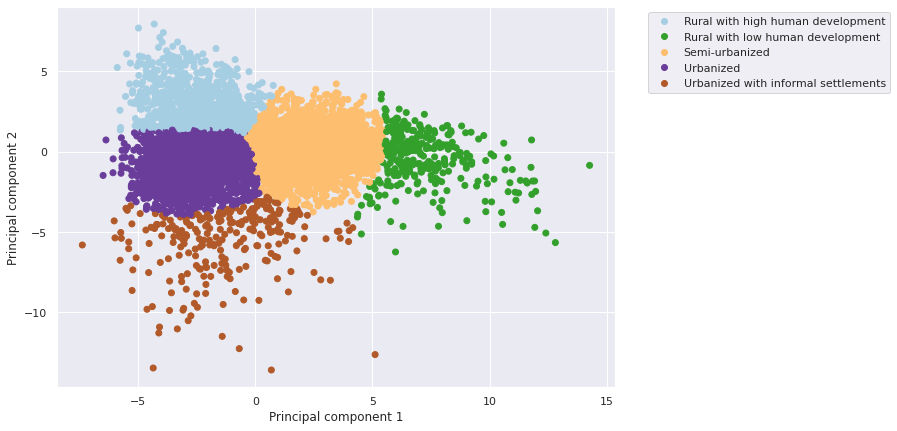

In [83]:
plot_clusters(df, df_base_clusters['cluster_label'])

### Cluster 0: Semi-urbanized
- **Population**: Ranges from around 5,790 to 20,080, with a median population of approximately 11,000.
- **Age Distribution**: Generally balanced across different age ranges.
- **Urbanization**: Moderately urbanized with around 41% to 66% urban population.
- **Income**: Moderate per capita income, ranging from approximately 238 to 334 monetary units, with some variation.
- **Employment**: Significant proportion of self-employed workers and workers in commerce and services sectors.
- **Living Conditions**: Moderate percentage of households in informal settlements, some households without bathrooms, and a notable illiteracy rate.

### Cluster 1: Rural with high human development
- **Population**: Ranges from around 2,761 to 6,740, with a median population of approximately 4,170.
- **Age Distribution**: Skewed towards middle-aged and older populations.
- **Urbanization**: Moderately urbanized with around 34% to 58% urban population.
- **Income**: Relatively low to moderate per capita income, ranging from approximately 479 to 579 monetary units.
- **Employment**: Significant proportion of informal workers, particularly in agriculture and commerce.
- **Living Conditions**: Moderate to high percentage of households in informal settlements, some households without bathrooms, and a moderate illiteracy rate.

### Cluster 2: Urbanized with informal settlements
- **Population**: Ranges from around 8,2742 to 342,167, with a median population of approximately 156,491.
- **Age Distribution**: Balanced across different age ranges.
- **Urbanization**: Highly urbanized with around 89% to 99% urban population.
- **Income**: High per capita income, ranging from approximately 466 to 820 monetary units.
- **Employment**: Diverse employment sectors, with a significant presence in services and industry.
- **Living Conditions**: Varied, with some areas having a high percentage of households in informal settlements and a moderate illiteracy rate.

### Cluster 3: Rural with low human development
- **Population**: Ranges from around 10,602 to 28,307, with a median population of approximately 17,147.
- **Age Distribution**: Skewed towards younger populations, with a notable percentage of the population under 20 years old.
- **Urbanization**: Moderately urbanized with around 31% to 54% urban population.
- **Income**: Moderate per capita income, ranging from approximately 169 to 229 monetary units.
- **Employment**: Significant proportion of informal workers, particularly in agriculture and services.
- **Living Conditions**: Moderate to high percentage of households in informal settlements, some households without bathrooms, and a notable illiteracy rate.

### Cluster 4: Urbanized
- **Population**: Ranges from around 6,570 to 31,903, with a median population of approximately 13,976.
- **Age Distribution**: Balanced across different age ranges.
- **Urbanization**: Moderately urbanized with around 74% to 91% urban population.
- **Income**: Moderate to high per capita income, ranging from approximately 549 to 770 monetary units.
- **Employment**: Diverse employment sectors, with notable presence in commerce and services.
- **Living Conditions**: Varied, with some areas having a moderate percentage of households in informal settlements and a moderate illiteracy rate.

In [84]:
df_base_clusters.groupby('cluster_label').count()

,cluster,code_municipality_7,municipality,population,latitude,longitude,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
cluster_label,,,,,,,,,,,,,,,,,,,,,
Rural with high human development,857,857,857,857,857,857,857,857,857,857,...,857,857,857,857,857,857,857,857,857,857
Rural with low human development,312,312,312,312,312,312,312,312,312,312,...,312,312,312,312,312,312,312,312,312,312
Semi-urbanized,2136,2136,2136,2136,2136,2136,2136,2136,2136,2136,...,2136,2136,2136,2136,2136,2136,2136,2136,2136,2136
Urbanized,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,...,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994
Urbanized with informal settlements,261,261,261,261,261,261,261,261,261,261,...,261,261,261,261,261,261,261,261,261,261


In [85]:
df_base_clusters[(df_base_clusters['cluster_label']=='Urbanized with informal settlements') & (df_base_clusters['municipality'].str.contains('(ES)'))]

<ipython-input-85-ed68d325576d>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_base_clusters[(df_base_clusters['cluster_label']=='Urbanized with informal settlements') & (df_base_clusters['municipality'].str.contains('(ES)'))]


,cluster,code_municipality_7,municipality,population,latitude,longitude,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,...,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18,cluster_label
3112,2,3201209,Cachoeiro de Itapemirim (ES),185784,-20.850112,-41.111919,24.617836,29.858868,27.812406,17.711967,...,8.48,29.66,0.32,4.79,20.66,45.67,13.87,4.26,9.61,Urbanized with informal settlements
3113,2,3201308,Cariacica (ES),353510,-20.294678,-40.390559,27.685214,30.012447,27.020169,15.276796,...,9.30,29.55,3.31,1.28,19.79,50.07,9.53,4.53,9.38,Urbanized with informal settlements
3125,2,3202405,Guarapari (ES),124656,-20.665975,-40.495021,25.815043,28.639616,28.093313,17.452028,...,9.47,36.88,0.44,6.72,18.65,48.23,6.57,4.20,8.91,Urbanized with informal settlements
3139,2,3203205,Linhares (ES),166786,-19.398106,-40.065306,28.688859,32.753349,25.523125,13.034667,...,8.45,30.86,0.57,14.71,17.12,38.66,14.17,5.88,8.97,Urbanized with informal settlements
3153,2,3204203,Piúma (ES),22300,-20.837609,-40.727981,26.363229,28.582960,27.627803,17.426009,...,8.04,50.96,0.69,9.47,20.76,42.32,8.64,4.55,9.04,Urbanized with informal settlements
3164,2,3204906,São Mateus (ES),123750,-18.718447,-39.858201,27.988687,31.078788,26.672323,14.261818,...,9.86,42.15,0.80,22.75,15.06,37.21,6.45,7.22,9.25,Urbanized with informal settlements
3166,2,3205002,Serra (ES),520649,-20.156770,-40.275217,28.102234,32.809052,26.320611,12.768871,...,10.33,27.24,2.15,1.11,16.11,46.71,12.15,3.88,9.40,Urbanized with informal settlements
3170,2,3205101,Viana (ES),73423,-20.390863,-40.495624,27.485938,32.650532,26.573417,13.290113,...,9.82,33.04,3.48,4.68,17.55,49.35,8.81,5.59,8.48,Urbanized with informal settlements
3173,2,3205200,Vila Velha (ES),467722,-20.338374,-40.293957,23.562073,31.359012,27.750459,17.328456,...,7.35,30.00,0.87,0.88,19.07,51.40,11.26,2.56,9.83,Urbanized with informal settlements
3174,2,3205309,Vitória (ES),322869,-20.320154,-40.322209,22.290465,29.886734,27.751193,20.071608,...,7.55,23.68,0.34,0.74,14.89,61.70,6.69,2.24,10.04,Urbanized with informal settlements


In [89]:
df_base_clusters.loc[df_base_clusters['cluster_label'] == 'Urbanized with informal settlements', 'cluster_label'] = 'Urbanized with \ninformal settlements'
df_base_clusters.loc[df_base_clusters['cluster_label'] == 'Rural with high human development', 'cluster_label'] = 'Rural with high \nhuman development'
df_base_clusters.loc[df_base_clusters['cluster_label'] == 'Rural with low human development', 'cluster_label'] = 'Rural with low \nhuman development'

In [90]:
labels_sorted = ['Urbanized','Urbanized with \ninformal settlements','Semi-urbanized','Rural with high \nhuman development','Rural with low \nhuman development']

In [92]:
df_base_clusters['cluster_label'] = pd.Categorical(df_base_clusters['cluster_label'], categories=labels_sorted, ordered=True)
df_base_clusters_sorted = df_base_clusters.sort_values('cluster_label').reset_index(drop=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


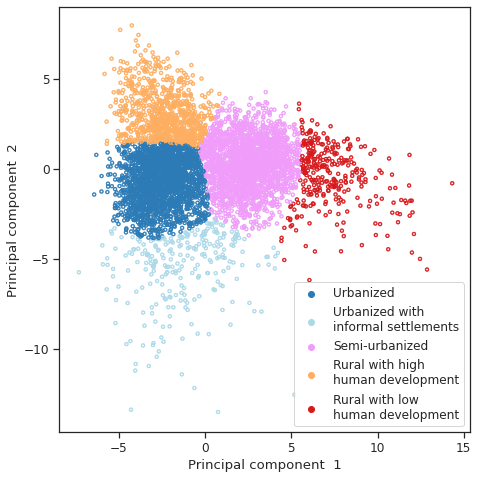

In [93]:
sns.set(font_scale=1.1)
sns.set_style("ticks")
sns.set_palette(get_default_colors_seaborn(5))

fig, ax = plt.subplots(figsize=(centimeter_to_inch(17.4), centimeter_to_inch(17.4)))
grafico = sns.scatterplot(x=df.principal_component_1, y=df.principal_component_2, hue=df_base_clusters.cluster_label, marker="$\circ$", ec="face")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=3)
plt.legend(loc='best')
plt.xlabel('Principal component  1')
plt.ylabel('Principal component  2')

plt.tight_layout()

plt.savefig('images/scatter_clusters.eps', bbox_inches="tight")
plt.savefig('images/scatter_clusters.pdf', bbox_inches="tight")
plt.savefig('images/scatter_clusters.png', bbox_inches="tight")
plt.show()

## PCA analysis

In [26]:
df_dataset = pd.read_csv('data/output/'+selected_dataset+'.csv', index_col=0)

In [27]:
if selected_set_features == 'without_collinearity':
    df_without_collinearity_standardized = pd.read_csv('data/output/df_without_collinearity_standardized.csv', index_col=0)
    
    features_without_collinearity = df_without_collinearity_standardized.columns

    features_to_transform = [
        'percentage_estimated_households_in_informal_settlements', 
        'demographic_density_in_informal_settlements', 
        'percentage_hospitalizations_diseases_inadequate_sanitation',           
        'percentage_indigenous_population'
    ]
    features_without_collinearity_transformed = [
        f'sqrt_{feature}' if feature in features_to_transform else feature 
        for feature in features_without_collinearity
    ]
    
    features_to_transform = [
        'demographic_density',  
        'per_capita_income'
    ]
    features_without_collinearity_transformed = [
        f'log_{feature}' if feature in features_to_transform else feature 
        for feature in features_without_collinearity_transformed
    ]

    df_dataset = df_dataset[features_without_collinearity_transformed]

In [28]:
pca = PCA(n_components=2, whiten=False)
pca_transformed = pca.fit_transform(df_dataset)
print(sum(pca.explained_variance_ratio_))
columns = ['componente_principal_1', 'componente_principal_2']
df_pca = pd.DataFrame(pca_transformed, columns=columns, index=df_dataset.index)

0.4987454081240198


In [29]:
df.describe().round(2)

,principal_component_1,principal_component_2
count,5560.00,5560.00
mean,0.00,0.00
std,3.24,2.22
min,-7.39,-13.58
25%,-2.65,-1.20
50%,-0.67,0.11
75%,2.44,1.34
max,14.27,7.94


In [30]:
pd.DataFrame(pca_transformed).describe().round(2)

,0,1
count,5560.00,5560.00
mean,0.00,0.00
std,3.24,2.22
min,-7.39,-13.58
25%,-2.65,-1.20
50%,-0.67,0.11
75%,2.44,1.34
max,14.27,7.94


In [31]:
# Adjust to show PCA in the same direction of the original PCA dataset.
# pca_transformed[:,1] = pca_transformed[:,1] * -1

In [32]:
eigenvalues = pca.explained_variance_
eigenvalues

array([10.52622478,  4.93766415])

In [33]:
# Adjust to show PCA in the same direction of the original PCA dataset.
# pca.components_[1] = pca.components_[1] * -1

In [34]:
df_eigenvectors = pd.DataFrame(pca.components_, columns=df_dataset.columns)
df_eigenvectors

,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,percentage_urban_population,demographic_density,average_residents_per_households,percentage_population_in_households_more_2_residents_per_bedroom,percentage_male_population,percentage_indigenous_population,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
0,0.255524,0.093778,-0.242184,-0.189718,-0.148292,-0.043351,0.237000,0.256350,0.068929,0.092920,...,-0.003904,0.113983,0.241027,0.196342,0.150549,-0.084934,-0.070438,-0.166918,0.246572,-0.196565
1,-0.130462,-0.259201,0.109055,0.241304,-0.311171,-0.194768,-0.104848,-0.157028,0.161825,-0.034422,...,0.218702,-0.230900,0.174624,-0.067229,0.352652,-0.299203,-0.322094,-0.119285,0.078444,0.036235


In [35]:
df_eigenvectors_T = df_eigenvectors.T
df_eigenvectors_T['0_abs'] = df_eigenvectors_T[0].abs()
df_eigenvectors_T = df_eigenvectors_T.reset_index()
# df_eigenvectors_T['index'] = yticklabels_without_number
df_eigenvectors_T = df_eigenvectors_T.sort_values(by='0_abs', ascending=False)
df_eigenvectors_T

,index,0,1,0_abs
14,per_capita_cash_transfer_program,0.266062,0.026460,0.266062
12,per_capita_income,-0.258359,-0.082445,0.258359
7,percentage_population_in_households_more_2_res...,0.256350,-0.157028,0.256350
0,percentage_population_age_range_0_19,0.255524,-0.130462,0.255524
11,life_expectancy_at_birth,-0.250235,-0.040254,0.250235
29,illiteracy_rate,0.246572,0.078444,0.246572
2,percentage_population_age_range_40_59,-0.242184,0.109055,0.242184
23,percentage_informal_workers,0.241027,0.174624,0.241027
6,average_residents_per_households,0.237000,-0.104848,0.237000
18,percentage_population_in_households_without_ba...,0.228570,-0.001297,0.228570


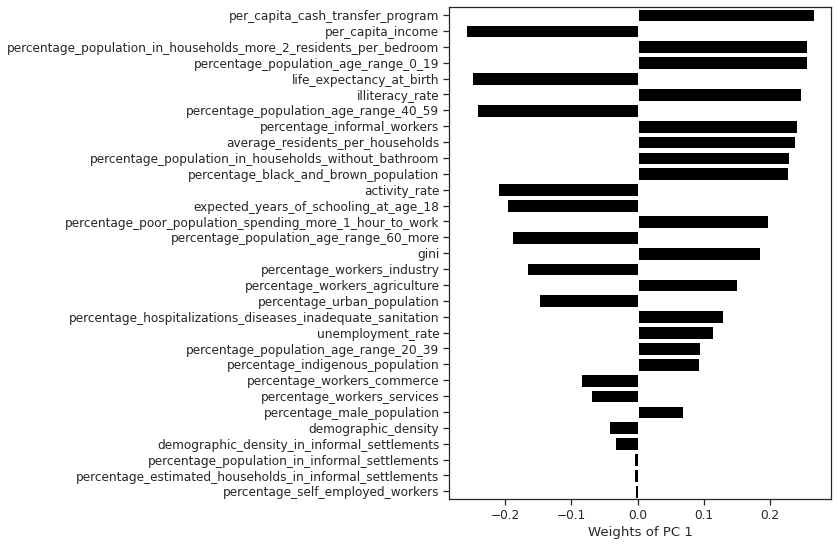

In [36]:
sns.set(font_scale=1.1)
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(centimeter_to_inch(17.4), centimeter_to_inch(23)))
sns.barplot(x=0, y="index", data=df_eigenvectors_T, color='black')
plt.xlabel('Weights of PC 1')
plt.ylabel(None)
plt.show()

In [37]:
df_eigenvectors_T = df_eigenvectors.T
df_eigenvectors_T['1_abs'] = df_eigenvectors_T[1].abs()
df_eigenvectors_T = df_eigenvectors_T.reset_index()
# df_eigenvectors_T['index'] = yticklabels_without_number
df_eigenvectors_T = df_eigenvectors_T.sort_values(by='1_abs', ascending=False)
df_eigenvectors_T

,index,0,1,1_abs
25,percentage_workers_agriculture,0.150549,0.352652,0.352652
27,percentage_workers_services,-0.070438,-0.322094,0.322094
4,percentage_urban_population,-0.148292,-0.311171,0.311171
26,percentage_workers_commerce,-0.084934,-0.299203,0.299203
1,percentage_population_age_range_20_39,0.093778,-0.259201,0.259201
3,percentage_population_age_range_60_more,-0.189718,0.241304,0.241304
22,unemployment_rate,0.113983,-0.230900,0.230900
15,percentage_estimated_households_in_informal_se...,-0.004890,-0.228993,0.228993
21,percentage_self_employed_workers,-0.003904,0.218702,0.218702
16,percentage_population_in_informal_settlements,-0.005093,-0.209419,0.209419


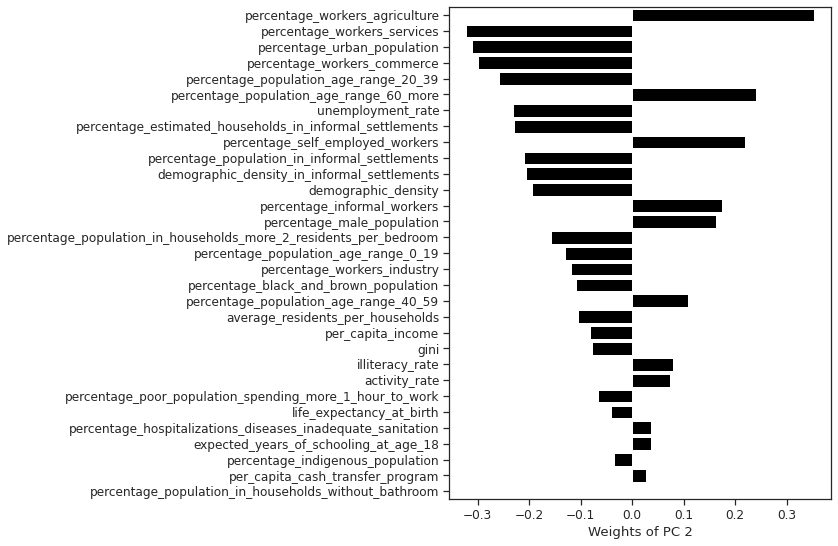

In [38]:
fig, ax = plt.subplots(figsize=(centimeter_to_inch(17.4), centimeter_to_inch(23)))
sns.barplot(x=1, y="index", data=df_eigenvectors_T, color='black')
plt.xlabel('Weights of PC 2')
plt.ylabel(None)
plt.show()

In [39]:
def make_legend_arrow(legend, orig_handle,
                      xdescent, ydescent,
                      width, height, fontsize):
    p = mpl.patches.FancyArrow(0, 0.5*height, width, 0, length_includes_head=True, head_width=0.75*height )
    return p

def biplot(score, coeff, feature_names, filtro_atributos, clusters):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    sns.set(font_scale=1.1)
    sns.set_style("ticks")

    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    fig, ax = plt.subplots(figsize=(centimeter_to_inch(17.4), centimeter_to_inch(17.4)))
    # handle_scatterplot = sns.scatterplot(x=xs, y=ys, color='w', edgecolor='gainsboro', legend=True)
    # handle_scatterplot = plt.scatter(x=xs, y=ys, c='w', edgecolors='gainsboro')
    colors = ['red','blue','green','pink','orange']
    for cluster, color in zip(np.unique(clusters), colors):
        print(cluster,': ',color)
        handle_scatterplot = plt.scatter(x=xs[clusters==cluster], y=ys[clusters==cluster], c='w', edgecolors=color)

    handle_top_five_influence = None
    handle_low_influence = None
    for i in range(n):
        if feature_names[i] in filtro_atributos:
            #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
            handle = plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'black', linestyle = '-',linewidth = 1.5, head_width=0.05, head_length=0.05)
            if handle_top_five_influence is None:
                handle_top_five_influence = handle
            ha = 'left'
            if feature_names[i] == '% urban population':
                ha = 'center'
            plt.text(coeff[i,0] + 0.025, coeff[i,1] - 0.035, feature_names[i], color = 'black', ha = ha, va = 'top')
        else:
            handle = plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'gray', linestyle = '-',linewidth = 1.5, head_width=0.05, head_length=0.05)
            if handle_low_influence is None:
                handle_low_influence = handle

    plt.xlabel("Principal component {}".format(1))
    plt.ylabel("Principal component {}".format(2))    
    plt.xlim([-8,14])
    plt.ylim([8,-14])
    plt.legend([handle_top_five_influence, handle_low_influence, handle_scatterplot], ['Top 5 weights', 'Low influence weights', 'Point scores'], handler_map={mpl.patches.FancyArrow : mpl.legend_handler.HandlerPatch(patch_func=make_legend_arrow)})
    # plt.legend([handle_scatterplot], ['Point score'])
    plt.tick_params(axis='both', which='both', labelsize=14)

Rural with high human development :  red
Rural with low human development :  blue
Semi-urbanized :  green
Urbanized :  pink
Urbanized with informal settlements :  orange


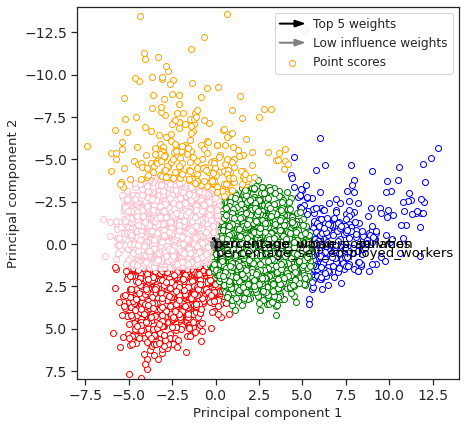

In [40]:
attributes_filter = ['percentage_urban_population', 'percentage_self_employed_workers', 'percentage_workers_services']
biplot(pca_transformed[:,0:2], np.transpose(pca.components_[0:2, :]), df_dataset.columns, attributes_filter, df_base_clusters.cluster_label)
plt.show()

## Cluster analysis


Semi-urbanized
PC 1


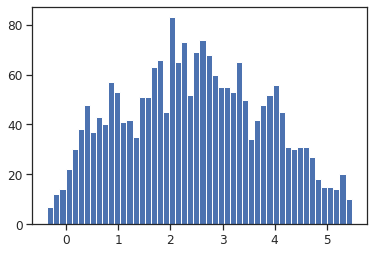

Shapiro-Wilk Test Statistic: 0.9834902882575989
p-value: 5.082829570104454e-15
Sample does not look Gaussian (reject H0)
Skewness: 0.0796896554731366
Kurtosis: 2.186717801895042
PC 2


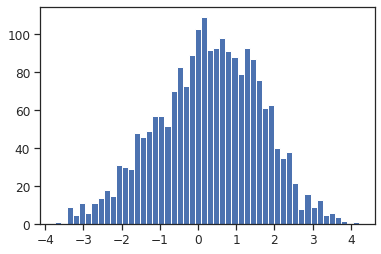

Shapiro-Wilk Test Statistic: 0.9954332709312439
p-value: 4.093844381714007e-06
Sample does not look Gaussian (reject H0)
Skewness: -0.19228471006941542
Kurtosis: 2.7416996056383502

Urbanized
PC 1


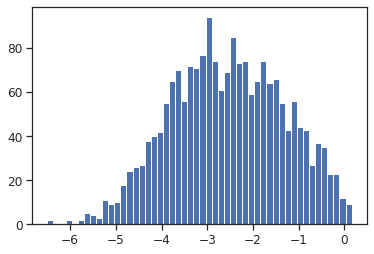

Shapiro-Wilk Test Statistic: 0.9918895959854126
p-value: 4.440502188174378e-09
Sample does not look Gaussian (reject H0)
Skewness: -0.06051691741754817
Kurtosis: 2.4282896984900697
PC 2


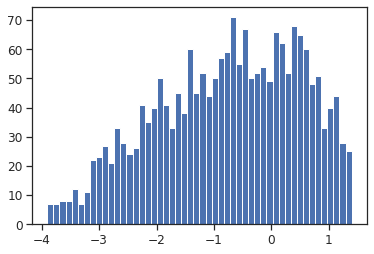

Shapiro-Wilk Test Statistic: 0.9718190431594849
p-value: 2.358373868968113e-19
Sample does not look Gaussian (reject H0)
Skewness: -0.3309531687090686
Kurtosis: 2.234066552415236

Rural with high human development
PC 1


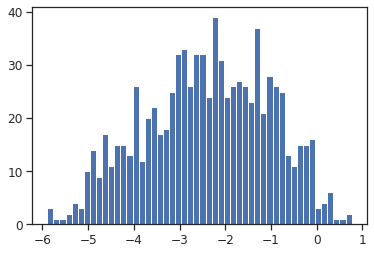

Shapiro-Wilk Test Statistic: 0.9876559376716614
p-value: 1.2738831856040633e-06
Sample does not look Gaussian (reject H0)
Skewness: -0.1673302113766492
Kurtosis: 2.3233390726195626
PC 2


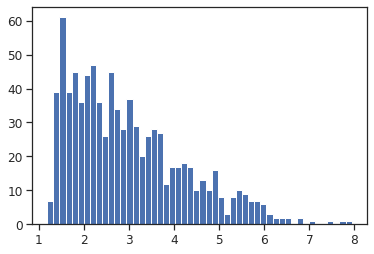

Shapiro-Wilk Test Statistic: 0.9265024662017822
p-value: 4.758161633902944e-20
Sample does not look Gaussian (reject H0)
Skewness: 0.9008459819743333
Kurtosis: 3.3132527420658264

Urbanized with informal settlements
PC 1


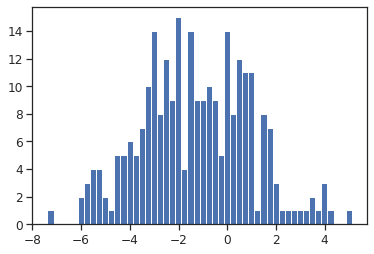

Shapiro-Wilk Test Statistic: 0.9943320751190186
p-value: 0.4393238425254822
Sample looks Gaussian (fail to reject H0)
Skewness: 0.10037705608256771
Kurtosis: 2.742713974982355
PC 2


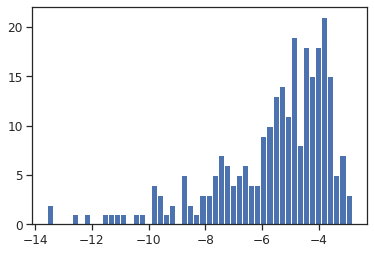

Shapiro-Wilk Test Statistic: 0.876591145992279
p-value: 1.1054027295289218e-13
Sample does not look Gaussian (reject H0)
Skewness: -1.4071205530659574
Kurtosis: 4.985120840692451

Rural with low human development
PC 1


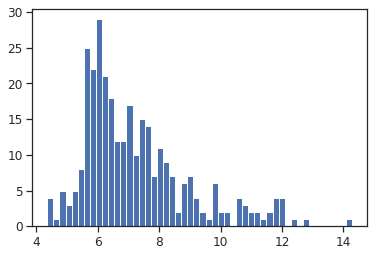

Shapiro-Wilk Test Statistic: 0.900616466999054
p-value: 1.91876232242226e-13
Sample does not look Gaussian (reject H0)
Skewness: 1.2071189419055255
Kurtosis: 4.2194726354963485
PC 2


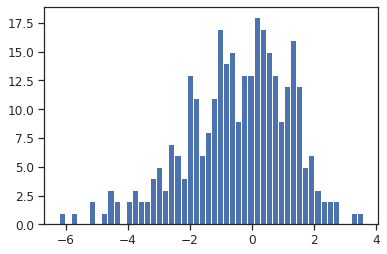

Shapiro-Wilk Test Statistic: 0.9789473414421082
p-value: 0.00015231857832986861
Sample does not look Gaussian (reject H0)
Skewness: -0.5669458849985434
Kurtosis: 3.247523752520667


In [41]:
alpha = 0.05

for cluster in df_base_clusters['cluster_label'].unique():
    print('\n'+cluster)    
    df_components = df[df_base_clusters['cluster_label'] == cluster]
    
    print('PC 1')
    plt.hist(df_components['principal_component_1'], bins=50)
    plt.show()
    statistic, p_value = shapiro(df_components['principal_component_1'])
    print("Shapiro-Wilk Test Statistic:", statistic)
    print("p-value:", p_value)    
    if p_value > alpha:
        print("Sample looks Gaussian (fail to reject H0)")
    else:
        print("Sample does not look Gaussian (reject H0)")
    # Compute skewness
    skewness = skew(df_components['principal_component_1'])
    
    # Compute kurtosis
    kurt = kurtosis(df_components['principal_component_1'], fisher=False)
    
    # Print the results
    print("Skewness:", skewness)
    print("Kurtosis:", kurt)        

    print('PC 2')
    plt.hist(df_components['principal_component_2'], bins=50)
    plt.show()
    statistic, p_value = shapiro(df_components['principal_component_2'])
    print("Shapiro-Wilk Test Statistic:", statistic)
    print("p-value:", p_value)    
    if p_value > alpha:
        print("Sample looks Gaussian (fail to reject H0)")
    else:
        print("Sample does not look Gaussian (reject H0)")
    # Compute skewness
    skewness = skew(df_components['principal_component_2'])
    
    # Compute kurtosis
    kurt = kurtosis(df_components['principal_component_2'], fisher=False)
    
    # Print the results
    print("Skewness:", skewness)
    print("Kurtosis:", kurt)    

## Saving data

In [42]:
df_labeled_cluster = df_base_clusters[['code_municipality_7', 'cluster','cluster_label']]

In [43]:
df_labeled_cluster.to_csv('data/output/df_labeled_cluster.csv', index=True)